In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import seaborn as sns
import sklearn
import gensim

Để thực hiện EDA cho bộ dữ liệu, trước tiên nhóm tiến hành import các thư viện liên quan để sử dụng, trong đó bao gồm:
*   Pandas - thư viện được sử dụng để xử lý và phân tích dữ liệu
*   Matplotlib - thư viện vẽ đồ thị và biểu đồ
*   NumPy - thư viện cung cấp hỗ trợ cho việc làm việc với mảng đa chiều và ma trận
*   NLTK - thư viện xử lý ngôn ngữ tự nhiên
*   Seaborn - thư viện trực quan hóa dữ liệu dựa trên Matplotlib
*   Scikit-learn - thư viện học máy
*   Gensim - thư viện được sử dụng cho việc mô hình hóa chủ đề và phân tích độ tương đồng giữa các văn bản











In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
comments= pd.read_csv('/content/drive/Shareddrives/BA/R Python/Đồ án/FInal/Data/fashion_v2.csv')
comments.head(6)

,cmtid,itemid,name,comment,rating_star,clean_cmt
0,13239687733,23886482112,Áo len cardigan trơn dáng rộng AO26,mặc khá mát vải này cũng ổn đẹp tuyệt với cho ...,5,mặc khá mát vải này cũng ổn đẹp tuyệt với cho ...
1,13239626315,23886482112,Áo len cardigan trơn dáng rộng AO26,hàng giao nhanhh chất lươngg sản phẩm tuyệt vo...,5,hàng giao nhanhh chất lươngg sản_phẩm tuyệt vo...
2,13239565011,23886482112,Áo len cardigan trơn dáng rộng AO26,"Sp rất đẹp ,thơm, shop giao siêu nhanh, chất v...",5,sản_phẩm rất đẹp thơm shop giao siêu nhanh chấ...
3,13175587025,18894188708,"Áo Khoác Thom , Áo Khoác Lông Cừu 4 Sọc Cánh T...",Màu sắc:ko\nChất liệu:ko cos\nĐúng với mô tả:k...,1,màu_sắc không chất_liệu không cos đúng với mô_...
4,13253091864,18894188708,"Áo Khoác Thom , Áo Khoác Lông Cừu 4 Sọc Cánh T...",Màu sắc:đen\nĐúng với mô tả:cũng OK\nChất liệu...,1,màu sắc đen đúng với mô_tả cũng ok chất_liệu c...
5,13194946753,18894188708,"Áo Khoác Thom , Áo Khoác Lông Cừu 4 Sọc Cánh T...",Đúng với mô tả:mua ao giao. Cái khác\n\nNhắn t...,1,đúng với mô_tả mua ao giao cái khác nhắn_tin s...


In [4]:
comments.shape

(14303, 6)

In [5]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14303 entries, 0 to 14302
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cmtid        14303 non-null  int64 
 1   itemid       14303 non-null  int64 
 2   name         14303 non-null  object
 3   comment      14302 non-null  object
 4   rating_star  14303 non-null  int64 
 5   clean_cmt    14303 non-null  object
dtypes: int64(3), object(3)
memory usage: 670.6+ KB


Tại đây, chúng ta thấy được các thông tin cơ bản của các biển có trong dữ liệu, bao gồm 5 biến, không có giá trị missing value, cũng như là thấy được kiểu dữ liệu của các biến được sử dụng:
*   RangeIndex: 14303 entries, 0 to 14302: Đây là chỉ số của DataFrame, cho biết có tổng cộng 14303 dòng (entries) từ 0 đến 14303.
*   Data columns (total 6 columns): Đây là thông tin về các cột dữ liệu trong DataFrame, tổng cộng có 6 cột.
> Các cột dữ liệu được liệt kê dưới đây, bao gồm:
*   index: Cột dữ liệu chứa các giá trị chỉ số (index) của DataFrame.
*  name, comment, clean_cmt: Các cột dữ liệu có kiểu dữ liệu object, lưu trữ thông tin về tên sản phẩm, comment của sản phẩm chưa xử lý và comment đã qua tiền xử lý.
*   cmtid, itemid, rating: Các cột dữ liệu có kiểu dữ liệu int64, lưu trữ thông tin về id của comment, id của sản phẩm và rating của sản phẩm.
*   non-null Count: Đây là số lượng giá trị không rỗng (non-null) trong từng cột dữ liệu.
*   non-null Count: Đây là số lượng giá trị không rỗng (non-null) trong từng cột dữ liệu.
*   dtype: Đây là kiểu dữ liệu của từng cột, bao gồm int64 (số nguyên) và object (kiểu dữ liệu chung cho chuỗi, đối tượng, v.v.).

In [6]:
comments.describe()

,cmtid,itemid,rating_star
count,1.430300e+04,1.430300e+04,14303.000000
mean,1.247532e+10,1.832506e+10,3.583444
std,1.426497e+09,5.196743e+09,1.424906
min,1.015613e+09,1.592182e+09,1.000000
25%,1.241445e+10,1.759931e+10,3.000000
50%,1.295878e+10,1.908257e+10,4.000000
75%,1.318567e+10,2.214877e+10,5.000000
max,1.334707e+10,2.545082e+10,5.000000


Bảng trên cho biết cái nhìn tổng quan về phân phối và đặc điểm của các cột dữ liệu rating_star trong Dataframe


In [7]:
import re

# Hàm để loại bỏ emoji từ một chuỗi
def remove_emoji(text):
    # Sử dụng biểu thức chính quy để tìm và xóa emoji có định dạng <emoji> </emoji>
    emoji_pattern = re.compile(r'<emoji>(.*?)</emoji>')
    return emoji_pattern.sub(r'', text)

# Áp dụng hàm remove_emoji cho cột 'clean_cmt'
comments['clean_cmt'] = comments['clean_cmt'].apply(remove_emoji)

# In ra comment sau khi xoá emoji để kiểm tra
comments['clean_cmt'].head(10)
# for i in range(10):
#   print("Comment after removing emoji:", remove_emoji(comments['clean_cmt'][i]))

0    mặc khá mát vải này cũng ổn đẹp tuyệt với cho ...
1    hàng giao nhanhh chất lươngg sản_phẩm tuyệt vo...
2    sản_phẩm rất đẹp thơm shop giao siêu nhanh chấ...
3    màu_sắc không chất_liệu không cos đúng với mô_...
4    màu sắc đen đúng với mô_tả cũng ok chất_liệu c...
5    đúng với mô_tả mua ao giao cái khác nhắn_tin s...
6    đúng với mô_tả không đúng đặt áo lông giao quầ...
7    đúng với mô_tả không chất_liệu không đúng với ...
8    màu_sắc sai hàng đúng với mô_tả sai hàng chất_...
9    chất_liệu không dung đúng với mô_tả sai màu_sắ...
Name: clean_cmt, dtype: object


> Các comment trên Shopee thường sẽ có nhiều emoji, điều đó sẽ làm ảnh hưởng quá trình trực quan hoá dữ liệu và kết quả thu được, vì vậy nhóm tiến hành loại bỏ các emoji xuất hiện trong các comment



In [8]:
comments['clean_cmt'] = comments['clean_cmt'].apply (lambda x: x.replace("màu_sắc","" ))
comments['clean_cmt'] = comments['clean_cmt'].apply (lambda x: x.replace("đúng với mô_tả","" ))
comments['clean_cmt'] = comments['clean_cmt'].apply (lambda x: x.replace("chất_liệu","" ))
comments['clean_cmt'].head(10)


0    mặc khá mát vải này cũng ổn đẹp tuyệt với cho ...
1    hàng giao nhanhh chất lươngg sản_phẩm tuyệt vo...
2    sản_phẩm rất đẹp thơm shop giao siêu nhanh chấ...
3     không  không cos  không chất_lượng sản_phẩm k...
4    màu sắc đen  cũng ok  chưa thấy vì rẻ lên đánh...
5     mua ao giao cái khác nhắn_tin shop không trả_...
6     không đúng đặt áo lông giao quần trẻ_con  đã ...
7     không  không đúng với đơn hàng đã đặt  trắng ...
8     sai hàng  sai hàng  sai hàng shop làm_ăn kiểu...
9     không dung  sai  sai làm người có tâm tý đê l...
Name: clean_cmt, dtype: object



> Các bình luận của shopee thường sẽ mặc định các mục như là "đúng với mô tả", "màu sắc", "chất liệu" để khách hàng có thể đánh giá, tuy nhiên, các dữ liệu này có thể làm nhiễu quá trình trực quan hoá dữ liệu và nó không quá cần thiết, vì vậy nhóm sẽ tiến hành loại bỏ các dữ liệu này



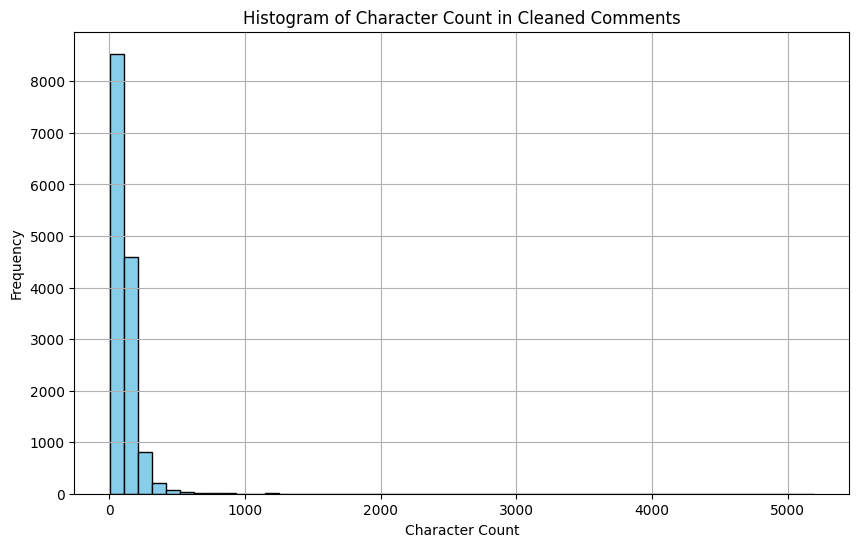

In [9]:
comments['char_count'] = comments['clean_cmt'].apply(len)

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
plt.hist(comments['char_count'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Character Count in Cleaned Comments')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



> Tiếp theo nhóm sẽ thực hiện việc tính độ dài ký tự của các bình luận sau khi đã được xử lý và sau đó vẽ biểu đồ histogram để hiển thị phân phối của số lượng ký tự trong các bình luận đã được làm sạch.


> Như chúng ta có thể thấy, độ dài của các bình luận phân bổ rơi vào khoảng 0-400 ký tự chiếm phần lớn






Word Count 0        13
1        11
2        12
3        20
4        25
         ..
14298    28
14299    42
14300    24
14301    14
14302    12
Name: word_count, Length: 14303, dtype: int64


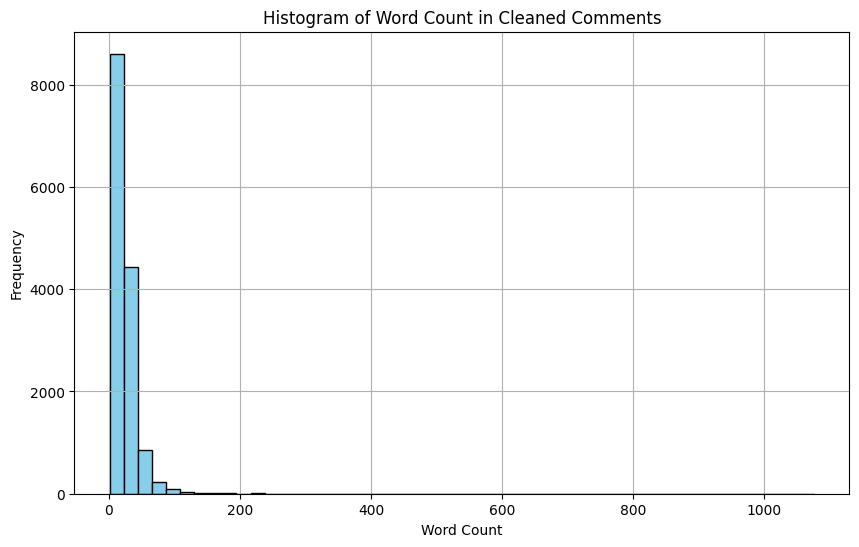

In [10]:
# Đếm số từ trong mỗi comment
comments['word_count'] = comments['clean_cmt'].apply(lambda x: len(x.split()))
#in ra màn hình số từ trong comment
print('Word Count', comments['word_count'])
# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
plt.hist(comments['word_count'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Word Count in Cleaned Comments')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


> Tiếp theo nhóm thực hiện việc đếm số từ trong mỗi bình luận sau khi đã được xử lý, sau đó in ra màn hình số từ trong mỗi bình luận và vẽ biểu đồ histogram để hiển thị phân phối của số từ trong các bình luận đã được làm sạch.


> Có thể thấy rằng số từ trong mỗi bình luận sau khi xử lý rơi vào khoảng 0-100 từ cho mỗi bình luận







Average Word Length: 3.761625092193464


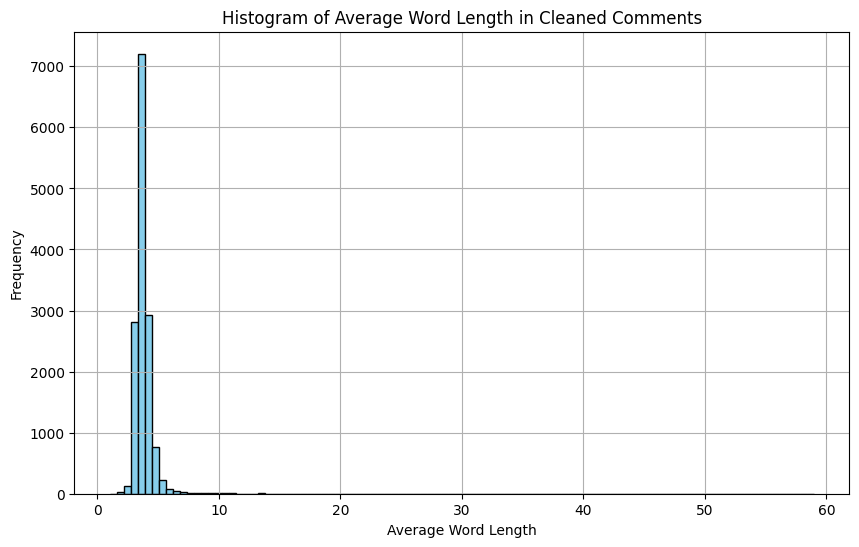

In [11]:
# Tính độ dài trung bình của từng từ trong mỗi comment và lưu vào cột 'avg_word_length'
comments['avg_word_length'] = comments['clean_cmt'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

# Tính giá trị trung bình của độ dài từ trong toàn bộ DataFrame
average_word_length = comments['avg_word_length'].mean()

# In giá trị trung bình
print("Average Word Length:", average_word_length)

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
plt.hist(comments['avg_word_length'], bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of Average Word Length in Cleaned Comments')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


> Nhóm thực hiện tính độ dài trung bình của mỗi từ trong mỗi bình luận, lưu kết quả vào một cột mới có tên là 'avg_word_length'.


> Sau đó, tính giá trị trung bình của độ dài từ trên toàn bộ DataFrame, in giá trị trung bình ra màn hình và vẽ biểu đồ histogram để hiển thị phân phối của độ dài trung bình của từ trong các bình luận đã được làm sạch.


> Như kết quả trên, ta có thể thấy rằng độ dài trung bình từ của dữ liệu bình luận rơi vào khoảng 0-10 chiếm phần nhiều, với giá trị trung bình là 4.007677548059302


In [12]:
from nltk import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter

# Tải tài nguyên punkt
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True



> Tiếp đó sử dụng thư viện NLTK để thực hiện việc tải tài nguyên "punkt" để có thể sử dụng word tokenization. Tài nguyên "punkt" là một bộ dữ liệu được sử dụng trong việc phân tách văn bản thành các từ hoặc câu. Trong đó bao gồm:


*   Import phương thức ngrams từ thư viện nltk - sử dụng để tạo ra các n-grams từ một chuỗi văn bản.
*   Import phương thức word_tokenize từ thư viện nltk - dùng để tách một câu thành các từ riêng lẻ.
*   Import lớp Counter từ thư viện collections - sử dụng để đếm số lần xuất hiện của các phần tử trong một iterable.







In [13]:
# Tokenize và tạo trigram cho mỗi comment
comments['clean_cmt_tokens'] = comments['clean_cmt'].apply(word_tokenize)
comments['trigrams'] = comments['clean_cmt_tokens'].apply(lambda x: list(ngrams(x, 3)))

# Tính tần suất của trigram
all_trigrams = [trigram for sublist in comments['trigrams'] for trigram in sublist]
trigram_freq = Counter(all_trigrams)

# Hiển thị tần suất của 10 trigram phổ biến nhất
print("Top 10 Trigrams:")
print(trigram_freq.most_common(10))

Top 10 Trigrams:
[(('màu', 'sắc', 'đen'), 1811), (('giao', 'hàng', 'nhanh'), 1291), (('nha', 'mọi', 'người'), 659), (('với', 'giá', 'tiền'), 630), (('nên', 'mua', 'nha'), 515), (('mọi', 'người', 'nên'), 476), (('người', 'nên', 'mua'), 353), (('mang', 'tính_chất', 'nhận'), 298), (('tính_chất', 'nhận', 'xu'), 289), (('không', 'nên', 'mua'), 279)]




> Tiếp theo nhóm thực hiện quá trình tokenize và tạo trigram cho mỗi bình luận trong DataFrame comments. Sau đó, nhóm tính tần suất xuất hiện của các trigram và hiển thị 10 trigram phổ biến nhất.


> Việc này giúp phân tích ngữ liệu của các trigram, tức là các cặp từ liên tiếp có độ dài ba, trong các bình luận đã được làm sạch. Các trigram phổ biến sẽ cung cấp thông tin về ngữ cảnh và các biểu hiện ngôn ngữ đặc biệt trong tập dữ liệu.





<Figure size 1200x600 with 0 Axes>

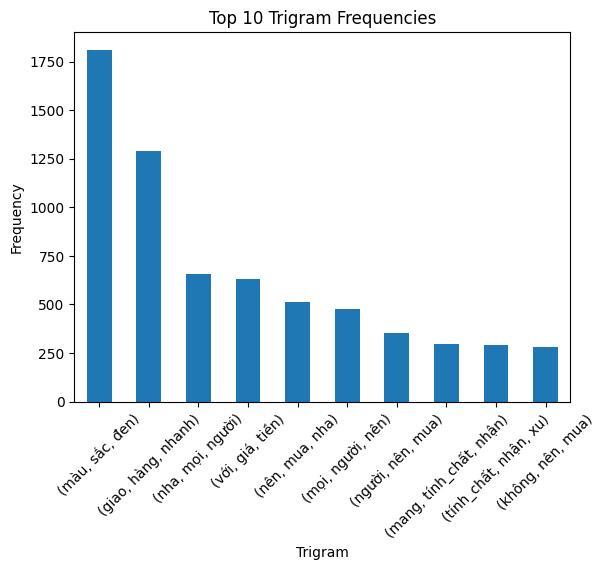

In [14]:
# Vẽ biểu đồ histogram cho tần suất của trigram
plt.figure(figsize=(12, 6))

# Chuyển đổi dữ liệu Counter thành DataFrame để vẽ biểu đồ
df_trigram_freq = pd.DataFrame.from_dict(trigram_freq, orient='index', columns=['Frequency'])
df_trigram_freq = df_trigram_freq.sort_values(by='Frequency', ascending=False)[:10]

# Vẽ biểu đồ bar
df_trigram_freq.plot(kind='bar', legend=False)
plt.title('Top 10 Trigram Frequencies')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



> Nhóm thực hiện vẽ biểu đồ thể hiện tần suất xuất hiện của 10 triagram phổ biến nhất


> Chúng ta có thể thấy rằng, các từ xuất hiện nhiều nhất là cụm "giao hàng nhanh" với tần suất rơi vào khoảng 1350 lần, các cụm từ còn lại như "ủng hộ shop", "nha mọi người",... rơi vào tần suất xuất hiện từ 400-700 lần





In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

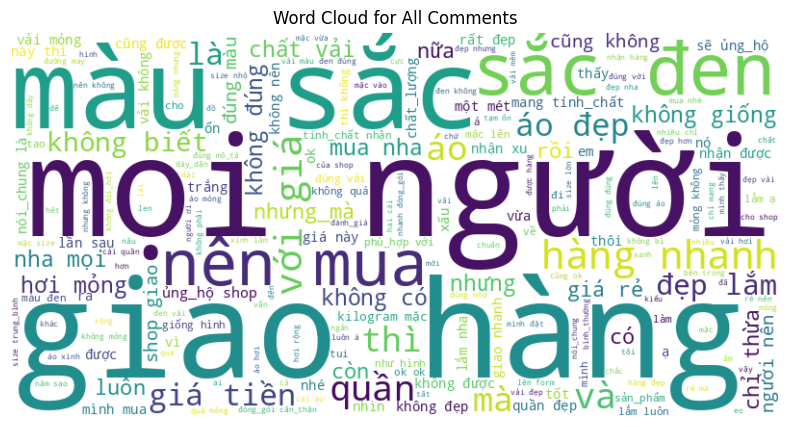

In [16]:
# Kết hợp nội dung của tất cả các comments
all_comments = ' '.join(comments['clean_cmt'].tolist())

# Tạo Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Vẽ Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Comments')
plt.show()




> Nhóm tiến hành vẽ wordcloud để hiểu được sự phân bố của các bình luận


> Quan sát biểu đồ trên, giá trị 'giao hàng', "mọi người" có tần suất lặp lại nhiều nhất nên có kích thước lớn nhất với xanh lá và xanh dương trên biểu đồ. Tiếp theo đó là các giá trị như: 'nên mua', 'hàng nhanh',...


> Các giá trị có tần suất lặp lại càng ít thì màu sắc càng mờ và cỡ chữ càng nhỏ như: 'quá mỏng', 'chỉ thừa',..



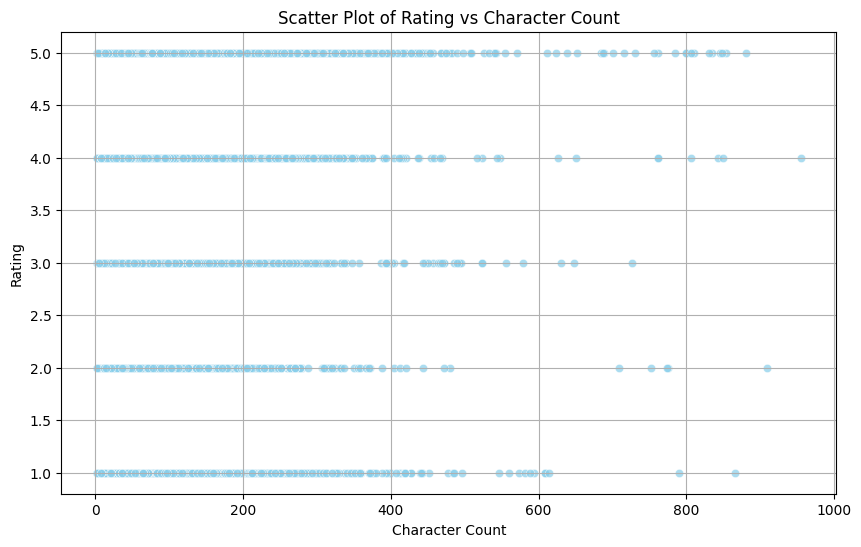

In [17]:
# Giới hạn Character Count từ 0 đến 1000
filtered_comments = comments[(comments['char_count'] >= 0) & (comments['char_count'] <= 1000)]
# Tạo một DataFrame chứa rating và độ dài của bình luận
data = pd.DataFrame({'rating_star': comments['rating_star'], 'CharCount': filtered_comments['char_count']})

# Vẽ biểu đồ scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CharCount', y='rating_star', data=data, color='skyblue', alpha=0.7)
plt.title('Scatter Plot of Rating vs Character Count')
plt.xlabel('Character Count')
plt.ylabel('Rating')
plt.grid(True)
plt.show()



> Nhóm thực hiện vẽ biểu đồ thể hiện sự tương quan giữa rating với độ dài ngắn của bình luận, tuy nhiên vì các comment sẽ rơi vào độ dài từ 0-1000 là chủ yếu nên nhóm sẽ giới hạn để có thể trực quan dữ liệu rõ hơn


> Theo đó có thể thấy các bình luận càng dài sẽ có rating càng cao rơi vào 4-5 sao, các bình luận 1-3 sao có độ dài ít hơn



